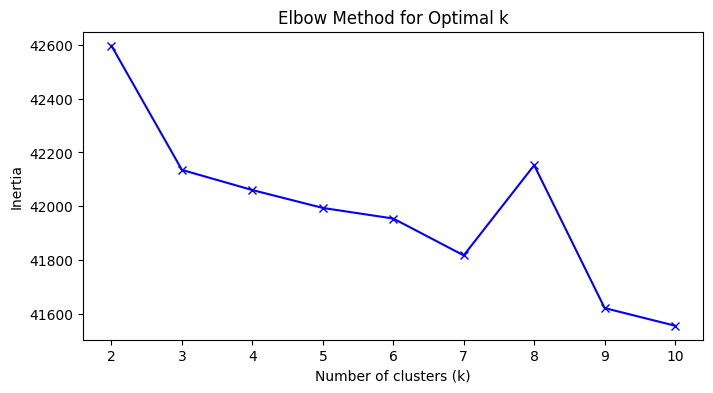

Cluster 0: rt, climate, change, trump, amp, world, fight, new, real, believe
Cluster 1: warming, global, rt, real, believe, trump, think, just, dont, like
Cluster 2: shes, going, doesnt, believe, husband, stephenschlegel, thinking, die, mr, millions
Cluster 3: climate, change, trump, real, fight, new, just, amp, people, dont


In [4]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

df = pd.read_csv('climate-change-sentiment.csv')

def clean_tweet(text):
    text = str(text).lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)

    return text.strip()

df['cleaned_message'] = df['message'].apply(clean_tweet)

df = df[df['cleaned_message'].str.len() > 0]

vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['cleaned_message'])

inertias = []
K = range(2, 11)
for k in K:
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans_temp.fit(X)
    inertias.append(kmeans_temp.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, inertias, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

k = 4

kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
labels = kmeans.fit_predict(X)
df['cluster'] = labels

terms = vectorizer.get_feature_names_out()
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]

for i in range(k):
    top_terms = [terms[ind] for ind in order_centroids[i, :10]]
    print(f"Cluster {i}: {', '.join(top_terms)}")